In [83]:
### Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Read in data
data_linear_true = pd.read_csv('../Data/Simulation/sim_int_truefeatures.csv') 
data_linear_extra = pd.read_csv('../Data/Simulation/sim_int_withextrafeatures.csv')
data_nonlinear_true = pd.read_csv('../Data/Simulation/sim_nonlinear_int_truefeatures.csv')
data_nonlinear_extra = pd.read_csv('../Data/Simulation/sim_nonlinear_int_withextrafeatures.csv')

x_linear_true = np.array(data_linear_true.iloc[:,1:data_linear_true.shape[1]]) #1:12 - true predictors, 13:17 - useless predictors
x_linear_extra = np.array(data_linear_extra.iloc[:,1:data_linear_extra.shape[1]])
y_linear = np.array(data_linear_true.iloc[:,0])

x_nonlinear_true = np.array(data_nonlinear_true.iloc[:,1:data_nonlinear_true.shape[1]])
xa_nonlinear_extra = np.array(data_nonlinear_extra.iloc[:,1:data_nonlinear_extra.shape[1]])
y_nonlinear = np.array(data_nonlinear_true.iloc[:,0])

In [10]:
### Define gini coefficient
import keras.backend as K
import tensorflow as tf
def gini(actual, pred):
    pred = tf.argmax(pred, axis=1)
    actual = tf.argmax(actual, axis=1)
    nT = K.shape(pred)[0]
    n = K.cast(nT, dtype='int32')
    n_float = K.cast(nT, dtype=K.floatx())
    actual = K.reshape(actual,(1,n))[-1]
    pred = K.reshape(pred,(1,n))[-1]
    inds = tf.nn.top_k(pred, n)[1]
    a_s = K.gather(actual, inds)
    a_c = K.cumsum(a_s)
    s1 = K.sum(a_c)
    s2 = K.sum(a_s)
    giniSum = K.cast(tf.divide(s1,s2),dtype=K.floatx()) - K.cast(tf.divide(n+1,2),dtype=K.floatx())
    standard_gini = K.cast(tf.divide(giniSum,n_float),dtype=K.floatx())
    return standard_gini

def gini_normalized(a, p):
    norm_gini = K.cast(tf.divide(gini(a, p),gini(a, a)),dtype=K.floatx())
    return norm_gini

In [106]:
## with interaction but no useless predictors
model1 = Sequential()
model1.add(Dense(20, input_dim=np.shape(x_linear_true)[1]-5, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model1.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace1 = model1.fit(x_linear_true[0:2500,0:12], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,0:12], y_linear[2500:3000]))
score1 = model1.evaluate(x_linear_true[2500:3000,0:12], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 1s 521us/step - loss: 1.1924 - acc: 0.6284 - gini_normalized: nan - val_loss: 1.0873 - val_acc: 0.7480 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 46us/step - loss: 1.0111 - acc: 0.7956 - gini_normalized: nan - val_loss: 0.9337 - val_acc: 0.8120 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 48us/step - loss: 0.8698 - acc: 0.8108 - gini_normalized: nan - val_loss: 0.8068 - val_acc: 0.8240 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 51us/step - loss: 0.7551 - acc: 0.8196 - gini_normalized: nan - val_loss: 0.7059 - val_acc: 0.8320 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 53us/step - loss: 0.6683 - acc: 0.8328 - gini_normalized: nan - val_loss: 0.6270 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=====

Epoch 45/50
2500/2500 [==============================] - 0s 51us/step - loss: 0.3662 - acc: 0.8572 - gini_normalized: nan - val_loss: 0.3586 - val_acc: 0.8600 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 51us/step - loss: 0.3651 - acc: 0.8612 - gini_normalized: nan - val_loss: 0.3572 - val_acc: 0.8580 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 50us/step - loss: 0.3655 - acc: 0.8596 - gini_normalized: nan - val_loss: 0.3599 - val_acc: 0.8480 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 48us/step - loss: 0.3646 - acc: 0.8592 - gini_normalized: nan - val_loss: 0.3566 - val_acc: 0.8560 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.3642 - acc: 0.8592 - gini_normalized: nan - val_loss: 0.3568 - val_acc: 0.8520 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 26us/step


In [107]:
score1

[0.36042652845382689, 0.84800000047683721, nan]

In [108]:
## without interaction or useless predictors
model2 = Sequential()
model2.add(Dense(20, input_dim=np.shape(x_linear_true)[1]-10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model2.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace2 = model2.fit(x_linear_true[0:2500,0:7], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,0:7], y_linear[2500:3000]))
score2 = model2.evaluate(x_linear_true[2500:3000,0:7], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 1s 521us/step - loss: 1.1430 - acc: 0.4904 - gini_normalized: nan - val_loss: 1.0618 - val_acc: 0.5840 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 48us/step - loss: 0.9962 - acc: 0.6296 - gini_normalized: nan - val_loss: 0.9440 - val_acc: 0.6260 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 41us/step - loss: 0.8898 - acc: 0.6444 - gini_normalized: nan - val_loss: 0.8526 - val_acc: 0.6460 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 54us/step - loss: 0.8074 - acc: 0.6972 - gini_normalized: nan - val_loss: 0.7803 - val_acc: 0.7300 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.7431 - acc: 0.7496 - gini_normalized: nan - val_loss: 0.7261 - val_acc: 0.7300 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=====

Epoch 45/50
2500/2500 [==============================] - 0s 40us/step - loss: 0.4448 - acc: 0.8448 - gini_normalized: nan - val_loss: 0.4441 - val_acc: 0.8300 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 50us/step - loss: 0.4442 - acc: 0.8460 - gini_normalized: nan - val_loss: 0.4419 - val_acc: 0.8420 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.4434 - acc: 0.8448 - gini_normalized: nan - val_loss: 0.4449 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 48us/step - loss: 0.4431 - acc: 0.8460 - gini_normalized: nan - val_loss: 0.4395 - val_acc: 0.8440 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 40us/step - loss: 0.4416 - acc: 0.8436 - gini_normalized: nan - val_loss: 0.4402 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 32us/step


In [109]:
score2

[0.44098266315460205, 0.84200000238418582, nan]

In [110]:
## with interaction and useless predictors
model3 = Sequential()
model3.add(Dense(20, input_dim=np.shape(x_linear_true)[1], kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model3.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace3 = model3.fit(x_linear_true[0:2500,:], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,:], y_linear[2500:3000]))
score3 = model3.evaluate(x_linear_true[2500:3000,:], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 2s 639us/step - loss: 1.2729 - acc: 0.5968 - gini_normalized: nan - val_loss: 1.1644 - val_acc: 0.5940 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 45us/step - loss: 1.0863 - acc: 0.6020 - gini_normalized: nan - val_loss: 1.0035 - val_acc: 0.5940 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.9402 - acc: 0.6100 - gini_normalized: nan - val_loss: 0.8727 - val_acc: 0.6200 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 50us/step - loss: 0.8221 - acc: 0.6892 - gini_normalized: nan - val_loss: 0.7656 - val_acc: 0.7420 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.7256 - acc: 0.7740 - gini_normalized: nan - val_loss: 0.6792 - val_acc: 0.8140 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=====

Epoch 45/50
2500/2500 [==============================] - 0s 42us/step - loss: 0.3671 - acc: 0.8652 - gini_normalized: nan - val_loss: 0.3656 - val_acc: 0.8460 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 47us/step - loss: 0.3672 - acc: 0.8608 - gini_normalized: nan - val_loss: 0.3618 - val_acc: 0.8560 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 45us/step - loss: 0.3665 - acc: 0.8596 - gini_normalized: nan - val_loss: 0.3690 - val_acc: 0.8540 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 36us/step - loss: 0.3663 - acc: 0.8612 - gini_normalized: nan - val_loss: 0.3582 - val_acc: 0.8520 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.3651 - acc: 0.8596 - gini_normalized: nan - val_loss: 0.3597 - val_acc: 0.8560 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 26us/step


In [111]:
score3

[0.35626611256599428, 0.85799999904632573, nan]

In [112]:
## with interaction and useless features & original useless predictors
model4 = Sequential()
model4.add(Dense(20, input_dim=np.shape(x_linear_extra)[1], kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model4.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace4 = model4.fit(x_linear_extra[0:2500,:], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_extra[2500:3000,:], y_linear[2500:3000]))
score4 = model4.evaluate(x_linear_extra[2500:3000,:], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 2s 703us/step - loss: 1.5229 - acc: 0.5956 - gini_normalized: nan - val_loss: 1.3460 - val_acc: 0.6860 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 44us/step - loss: 1.2642 - acc: 0.7072 - gini_normalized: nan - val_loss: 1.1313 - val_acc: 0.7520 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 52us/step - loss: 1.1024 - acc: 0.7532 - gini_normalized: nan - val_loss: 1.0224 - val_acc: 0.7800 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.9900 - acc: 0.7740 - gini_normalized: nan - val_loss: 0.9029 - val_acc: 0.7920 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.8994 - acc: 0.7904 - gini_normalized: nan - val_loss: 0.8367 - val_acc: 0.8000 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=====

Epoch 45/50
2500/2500 [==============================] - 0s 49us/step - loss: 0.4430 - acc: 0.8516 - gini_normalized: nan - val_loss: 0.4470 - val_acc: 0.8360 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 48us/step - loss: 0.4288 - acc: 0.8596 - gini_normalized: nan - val_loss: 0.4490 - val_acc: 0.8480 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.4274 - acc: 0.8612 - gini_normalized: nan - val_loss: 0.4532 - val_acc: 0.8320 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.4355 - acc: 0.8548 - gini_normalized: nan - val_loss: 0.4412 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.4317 - acc: 0.8592 - gini_normalized: nan - val_loss: 0.4428 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 32us/step


In [113]:
score4

[0.45423948431015015, 0.84400000238418582, nan]

.

C:\Users\Irina\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 8 iterations, alpha=2.171e-01, previous alpha=1.991e-01, with an active set of 9 regressors.
  ConvergenceWarning)


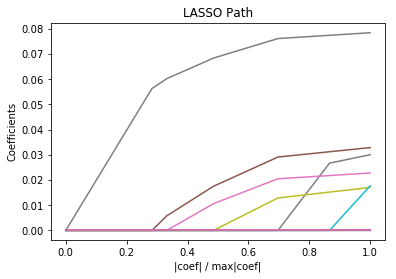

|coef| / max|coef| 0.669633684936
Nonzero features: 5
Nonzero columns: 
[25 26 27 28 31]


,25,26,27,28,31
0,1.707692,0.361229,5.692984,1.335716,-0.525556
1,1.962434,2.631511,6.007690,0.958707,0.696791
2,0.442242,0.216815,1.691355,2.163867,0.533716
3,3.235778,0.348115,2.392982,0.678406,-1.112818
4,1.180373,1.522978,1.192875,0.193737,0.394207


In [92]:
# Feature selection
from sklearn import linear_model
alphas, _, coefs = linear_model.lars_path(x_linear_extra[0:2500,:], y_linear[0:2500], method='lasso', verbose=True)

# Plot results
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
#plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

# Top 5 variables
i = 5
print('|coef| / max|coef|',xx[i])
print('Nonzero features:',sum(abs(coefs.T[i])>0))
print("Nonzero columns: ")
print(pd.DataFrame(x_linear_extra[0:2500,:]).iloc[:,abs(coefs.T[i])>0].columns.values)
pd.DataFrame(x_linear_extra[0:2500,:]).iloc[:,abs(coefs.T[i])>0].head()

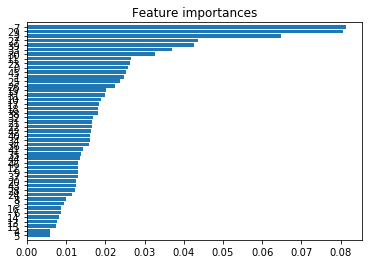

 1) 7                              0.081353
 2) 29                             0.080754
 3) 2                              0.064868
 4) 27                             0.043589
 5) 39                             0.042504
 6) 33                             0.036890
 7) 30                             0.032569
 8) 11                             0.026663
 9) 23                             0.026372
10) 0                              0.025795
11) 45                             0.025165
12) 1                              0.024811
13) 25                             0.023745
14) 26                             0.022431
15) 19                             0.020065
16) 31                             0.019842
17) 10                             0.018910
18) 17                             0.018439
19) 18                             0.018234
20) 38                             0.018050
21) 32                             0.016921
22) 21                             0.016702
23) 22                          

In [93]:
### Random forest feature importance
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x_linear_extra[0:2500,:], y_linear[0:2500])

### Plot feature importance
# https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(x_linear_extra[0:2500,:].shape[1]), importances[indices])#,
       #color="r")#, xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(x_linear_extra[0:2500,:].shape[1]), indices)
plt.ylim([-1, x_linear_extra[0:2500,:].shape[1]])
plt.show()

# Selected features
feat_labels = pd.DataFrame(x_linear_extra[0:2500,:]).columns
indices = np.argsort(forest.feature_importances_)[::-1]

for f in range(pd.DataFrame(x_linear_extra[0:2500,:]).shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

In [94]:
# Selecting features based on how precipitously variable coefficients fall to zero in lasso/at jump in variable importance:
selected_features = sorted(list(set(pd.DataFrame(x_linear_extra[0:2500,:]).iloc[:,abs(coefs.T[i])>0].columns.values.tolist()+ \
                                    indices[1:14].tolist())))
print(selected_features)

[0, 1, 2, 11, 23, 25, 26, 27, 28, 29, 30, 31, 33, 39, 45]


In [114]:
## Feature selection then NN
model5 = Sequential()
model5.add(Dense(20, input_dim=len(selected_features), kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model5.add(Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace5 = model5.fit(x_linear_extra[0:2500,selected_features], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_extra[2500:3000,selected_features], y_linear[2500:3000]))
score5 = model5.evaluate(x_linear_extra[2500:3000,selected_features], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 2s 729us/step - loss: 1.2316 - acc: 0.6800 - gini_normalized: nan - val_loss: 1.0546 - val_acc: 0.7560 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 50us/step - loss: 1.0668 - acc: 0.7608 - gini_normalized: nan - val_loss: 0.9639 - val_acc: 0.7720 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 45us/step - loss: 0.9553 - acc: 0.7800 - gini_normalized: nan - val_loss: 0.9034 - val_acc: 0.7820 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 50us/step - loss: 0.8593 - acc: 0.7952 - gini_normalized: nan - val_loss: 0.8081 - val_acc: 0.7880 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 48us/step - loss: 0.7747 - acc: 0.8008 - gini_normalized: nan - val_loss: 0.7585 - val_acc: 0.8060 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=====

Epoch 45/50
2500/2500 [==============================] - 0s 45us/step - loss: 0.4384 - acc: 0.8440 - gini_normalized: nan - val_loss: 0.4170 - val_acc: 0.8420 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 60us/step - loss: 0.4393 - acc: 0.8452 - gini_normalized: nan - val_loss: 0.4280 - val_acc: 0.8340 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 54us/step - loss: 0.4292 - acc: 0.8436 - gini_normalized: nan - val_loss: 0.4306 - val_acc: 0.8460 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.4292 - acc: 0.8464 - gini_normalized: nan - val_loss: 0.4430 - val_acc: 0.8400 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.4292 - acc: 0.8472 - gini_normalized: nan - val_loss: 0.4119 - val_acc: 0.8440 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 28us/step


In [115]:
score5

[0.41150368976593016, 0.83999999761581423, nan]

Validation accuracy


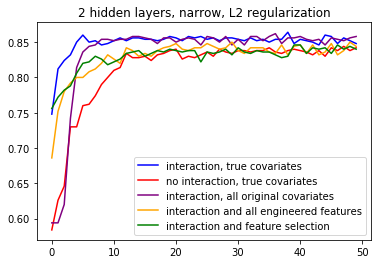

In [121]:
print('Validation accuracy')
plt.title('2 hidden layers, narrow, L2 regularization')
plt.plot(trace1.history['val_acc'],label='interaction, true covariates', color="blue")
plt.plot(trace2.history['val_acc'],label='no interaction, true covariates', color="red")
plt.plot(trace3.history['val_acc'],label='interaction, all original covariates', color="purple")
plt.plot(trace4.history['val_acc'],label='interaction and all engineered features', color="orange")
plt.plot(trace5.history['val_acc'],label='interaction and feature selection', color="green")
plt.legend(loc=4)
plt.show()

Adding engineered features improves performance in the first few iterations, but neural net is able to achieve the same performance within 50 iterations regardless of starting features. In fact, engineering additional features slightly harms perfromance in the end - accuracy is on the same level as not including interaction terms.

In [123]:
## with interaction and true covariates
model_narrow1 = Sequential()
model_narrow1.add(Dense(20, input_dim=np.shape(x_linear_true)[1]-5, activation='relu'))
model_narrow1.add(Dense(1, activation='sigmoid'))
model_narrow1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace_narrow1 = model_narrow1.fit(x_linear_true[0:2500,0:12], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,0:12], y_linear[2500:3000]))
score_narrow1 = model_narrow1.evaluate(x_linear_true[2500:3000,0:12], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 2s 694us/step - loss: 0.6628 - acc: 0.6652 - gini_normalized: nan - val_loss: 0.6353 - val_acc: 0.7100 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 51us/step - loss: 0.5817 - acc: 0.7256 - gini_normalized: nan - val_loss: 0.5610 - val_acc: 0.7340 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.5204 - acc: 0.7692 - gini_normalized: nan - val_loss: 0.5024 - val_acc: 0.7800 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 47us/step - loss: 0.4700 - acc: 0.8064 - gini_normalized: nan - val_loss: 0.4508 - val_acc: 0.8160 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 40us/step - loss: 0.4293 - acc: 0.8296 - gini_normalized: nan - val_loss: 0.4109 - val_acc: 0.8360 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=====

Epoch 45/50
2500/2500 [==============================] - 0s 43us/step - loss: 0.3044 - acc: 0.8660 - gini_normalized: nan - val_loss: 0.3048 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 48us/step - loss: 0.3042 - acc: 0.8656 - gini_normalized: nan - val_loss: 0.3045 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.3043 - acc: 0.8668 - gini_normalized: nan - val_loss: 0.3051 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.3040 - acc: 0.8656 - gini_normalized: nan - val_loss: 0.3049 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.3040 - acc: 0.8644 - gini_normalized: nan - val_loss: 0.3052 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 28us/step


In [125]:
## without interactions
model_narrow2 = Sequential()
model_narrow2.add(Dense(20, input_dim=np.shape(x_linear_true)[1]-10, activation='relu'))
model_narrow2.add(Dense(1, activation='sigmoid'))
model_narrow2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace_narrow2 = model_narrow2.fit(x_linear_true[0:2500,0:7], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,0:7], y_linear[2500:3000]))
score_narrow2 = model_narrow2.evaluate(x_linear_true[2500:3000,0:7], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 2s 700us/step - loss: 0.6548 - acc: 0.6336 - gini_normalized: nan - val_loss: 0.6370 - val_acc: 0.6800 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 53us/step - loss: 0.6096 - acc: 0.7068 - gini_normalized: nan - val_loss: 0.6029 - val_acc: 0.6920 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 55us/step - loss: 0.5791 - acc: 0.7276 - gini_normalized: nan - val_loss: 0.5768 - val_acc: 0.7100 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 57us/step - loss: 0.5551 - acc: 0.7388 - gini_normalized: nan - val_loss: 0.5561 - val_acc: 0.7080 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 57us/step - loss: 0.5365 - acc: 0.7448 - gini_normalized: nan - val_loss: 0.5396 - val_acc: 0.7140 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=====

Epoch 45/50
2500/2500 [==============================] - 0s 42us/step - loss: 0.3281 - acc: 0.8524 - gini_normalized: nan - val_loss: 0.3273 - val_acc: 0.8460 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.3272 - acc: 0.8520 - gini_normalized: nan - val_loss: 0.3267 - val_acc: 0.8460 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.3263 - acc: 0.8536 - gini_normalized: nan - val_loss: 0.3257 - val_acc: 0.8420 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.3259 - acc: 0.8544 - gini_normalized: nan - val_loss: 0.3257 - val_acc: 0.8440 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 48us/step - loss: 0.3251 - acc: 0.8532 - gini_normalized: nan - val_loss: 0.3256 - val_acc: 0.8400 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 32us/step


In [128]:
## with interaction and useless predictors
model_narrow3 = Sequential()
model_narrow3.add(Dense(20, input_dim=np.shape(x_linear_true)[1], activation='relu'))
model_narrow3.add(Dense(1, activation='sigmoid'))

model_narrow3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace_narrow3 = model_narrow3.fit(x_linear_true[0:2500,:], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,:], y_linear[2500:3000]))
score_narrow3 = model_narrow3.evaluate(x_linear_true[2500:3000,:], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 2s 970us/step - loss: 0.6436 - acc: 0.5972 - gini_normalized: nan - val_loss: 0.5820 - val_acc: 0.7360 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.5625 - acc: 0.7628 - gini_normalized: nan - val_loss: 0.5192 - val_acc: 0.8040 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 53us/step - loss: 0.5056 - acc: 0.8068 - gini_normalized: nan - val_loss: 0.4705 - val_acc: 0.8160 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 48us/step - loss: 0.4596 - acc: 0.8180 - gini_normalized: nan - val_loss: 0.4298 - val_acc: 0.8300 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 47us/step - loss: 0.4222 - acc: 0.8292 - gini_normalized: nan - val_loss: 0.3964 - val_acc: 0.8300 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=====

Epoch 45/50
2500/2500 [==============================] - 0s 42us/step - loss: 0.2991 - acc: 0.8680 - gini_normalized: nan - val_loss: 0.3021 - val_acc: 0.8540 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.2988 - acc: 0.8688 - gini_normalized: nan - val_loss: 0.3020 - val_acc: 0.8600 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 49us/step - loss: 0.2985 - acc: 0.8664 - gini_normalized: nan - val_loss: 0.3021 - val_acc: 0.8580 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 47us/step - loss: 0.2982 - acc: 0.8684 - gini_normalized: nan - val_loss: 0.3017 - val_acc: 0.8520 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.2985 - acc: 0.8692 - gini_normalized: nan - val_loss: 0.3020 - val_acc: 0.8520 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 38us/step


In [132]:
## with interaction and useless features & original useless predictors
model_narrow4 = Sequential()
model_narrow4.add(Dense(20, input_dim=np.shape(x_linear_extra)[1], activation='relu'))
model_narrow4.add(Dense(1, activation='sigmoid'))

model_narrow4.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace_narrow4 = model_narrow4.fit(x_linear_extra[0:2500,:], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_extra[2500:3000,:], y_linear[2500:3000]))
score_narrow4 = model_narrow4.evaluate(x_linear_extra[2500:3000,:], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 2s 644us/step - loss: 0.9340 - acc: 0.6664 - gini_normalized: nan - val_loss: 0.8950 - val_acc: 0.6880 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.6669 - acc: 0.7224 - gini_normalized: nan - val_loss: 0.7201 - val_acc: 0.7400 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 53us/step - loss: 0.5525 - acc: 0.7776 - gini_normalized: nan - val_loss: 0.6094 - val_acc: 0.7820 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 53us/step - loss: 0.4859 - acc: 0.8044 - gini_normalized: nan - val_loss: 0.5303 - val_acc: 0.8200 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 45us/step - loss: 0.4469 - acc: 0.8232 - gini_normalized: nan - val_loss: 0.4798 - val_acc: 0.8200 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=====

Epoch 45/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.3016 - acc: 0.8744 - gini_normalized: nan - val_loss: 0.3314 - val_acc: 0.8420 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 44us/step - loss: 0.2958 - acc: 0.8708 - gini_normalized: nan - val_loss: 0.3378 - val_acc: 0.8320 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 55us/step - loss: 0.3001 - acc: 0.8700 - gini_normalized: nan - val_loss: 0.3275 - val_acc: 0.8420 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 62us/step - loss: 0.2971 - acc: 0.8712 - gini_normalized: nan - val_loss: 0.3250 - val_acc: 0.8440 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 58us/step - loss: 0.2923 - acc: 0.8708 - gini_normalized: nan - val_loss: 0.3401 - val_acc: 0.8360 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 48us/step


In [133]:
## Feature selection then NN
model_narrow5 = Sequential()
model_narrow5.add(Dense(20, input_dim=len(selected_features), activation='relu'))
model_narrow5.add(Dense(1, activation='sigmoid'))

model_narrow5.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

trace_narrow5 = model_narrow5.fit(x_linear_extra[0:2500,selected_features], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_extra[2500:3000,selected_features], y_linear[2500:3000]))
score_narrow5 = model_narrow5.evaluate(x_linear_extra[2500:3000,selected_features], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 2s 711us/step - loss: 0.6483 - acc: 0.6984 - gini_normalized: nan - val_loss: 0.5821 - val_acc: 0.7740 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 49us/step - loss: 0.5445 - acc: 0.7964 - gini_normalized: nan - val_loss: 0.5278 - val_acc: 0.8060 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.4970 - acc: 0.8076 - gini_normalized: nan - val_loss: 0.4951 - val_acc: 0.8020 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 57us/step - loss: 0.4573 - acc: 0.8132 - gini_normalized: nan - val_loss: 0.4704 - val_acc: 0.8160 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 48us/step - loss: 0.4280 - acc: 0.8212 - gini_normalized: nan - val_loss: 0.4477 - val_acc: 0.8260 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=====

Epoch 45/50
2500/2500 [==============================] - 0s 51us/step - loss: 0.3234 - acc: 0.8536 - gini_normalized: nan - val_loss: 0.3618 - val_acc: 0.8380 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 57us/step - loss: 0.3264 - acc: 0.8552 - gini_normalized: nan - val_loss: 0.3245 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 53us/step - loss: 0.3281 - acc: 0.8496 - gini_normalized: nan - val_loss: 0.3558 - val_acc: 0.8400 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.3299 - acc: 0.8564 - gini_normalized: nan - val_loss: 0.3325 - val_acc: 0.8400 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 50us/step - loss: 0.3281 - acc: 0.8544 - gini_normalized: nan - val_loss: 0.3217 - val_acc: 0.8500 - val_gini_normalized: nan
Epoch 50/50
500/500 [==============================] - 0s 32us/step


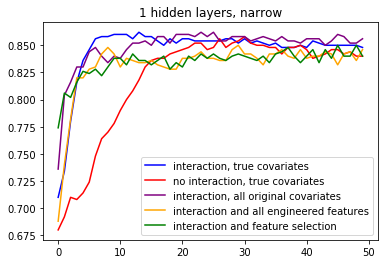

In [135]:
plt.title('1 hidden layers, narrow')
plt.plot(trace_narrow1.history['val_acc'],label='interaction, true covariates', color="blue")
plt.plot(trace_narrow2.history['val_acc'],label='no interaction, true covariates', color="red")
plt.plot(trace_narrow3.history['val_acc'],label='interaction, all original covariates', color="purple")
plt.plot(trace_narrow4.history['val_acc'],label='interaction and all engineered features', color="orange")
plt.plot(trace_narrow5.history['val_acc'],label='interaction and feature selection', color="green")
plt.legend(loc=4)
plt.show()

In [138]:
## with interaction but no useless predictors
model_wide1 = Sequential()
model_wide1.add(Dense(100, input_dim=np.shape(x_linear_true)[1]-5, activation='relu'))
model_wide1.add(Dense(1, activation='sigmoid'))
model_wide1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_wide1 = model_wide1.fit(x_linear_true[0:2500,0:12], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,0:12], y_linear[2500:3000]))
score_wide1 = model_wide1.evaluate(x_linear_true[2500:3000,0:12], y_linear[2500:3000], batch_size=64)

model_wide2 = Sequential()
model_wide2.add(Dense(100, input_dim=np.shape(x_linear_true)[1]-10, activation='relu'))
model_wide2.add(Dense(1, activation='sigmoid'))
model_wide2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_wide2 = model_wide2.fit(x_linear_true[0:2500,0:7], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,0:7], y_linear[2500:3000]))
score_wide2 = model_wide2.evaluate(x_linear_true[2500:3000,0:7], y_linear[2500:3000], batch_size=64)

model_wide3 = Sequential()
model_wide3.add(Dense(100, input_dim=np.shape(x_linear_true)[1], activation='relu'))
model_wide3.add(Dense(1, activation='sigmoid'))
model_wide3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])
trace_wide3 = model_wide3.fit(x_linear_true[0:2500,:], y_linear[0:2500],epochs=50,batch_size=64, \
                    validation_data=(x_linear_true[2500:3000,:], y_linear[2500:3000]))
score_wide3 = model_wide3.evaluate(x_linear_true[2500:3000,:], y_linear[2500:3000], batch_size=64)

Train on 2500 samples, validate on 500 samples
Epoch 1/50
2500/2500 [==============================] - 2s 737us/step - loss: 0.5551 - acc: 0.7788 - gini_normalized: nan - val_loss: 0.4646 - val_acc: 0.8460 - val_gini_normalized: nan
Epoch 2/50
2500/2500 [==============================] - 0s 56us/step - loss: 0.4220 - acc: 0.8500 - gini_normalized: nan - val_loss: 0.3795 - val_acc: 0.8440 - val_gini_normalized: nan
Epoch 3/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.3608 - acc: 0.8564 - gini_normalized: nan - val_loss: 0.3370 - val_acc: 0.8480 - val_gini_normalized: nan
Epoch 4/50
2500/2500 [==============================] - 0s 59us/step - loss: 0.3311 - acc: 0.8572 - gini_normalized: nan - val_loss: 0.3188 - val_acc: 0.8560 - val_gini_normalized: nan
Epoch 5/50
2500/2500 [==============================] - 0s 59us/step - loss: 0.3176 - acc: 0.8592 - gini_normalized: nan - val_loss: 0.3101 - val_acc: 0.8520 - val_gini_normalized: nan
Epoch 6/50
2500/2500 [=====

2500/2500 [==============================] - 0s 49us/step - loss: 0.2973 - acc: 0.8680 - gini_normalized: nan - val_loss: 0.3130 - val_acc: 0.8480 - val_gini_normalized: nan
Epoch 45/50
2500/2500 [==============================] - 0s 52us/step - loss: 0.2972 - acc: 0.8680 - gini_normalized: nan - val_loss: 0.3128 - val_acc: 0.8480 - val_gini_normalized: nan
Epoch 46/50
2500/2500 [==============================] - 0s 55us/step - loss: 0.2969 - acc: 0.8692 - gini_normalized: nan - val_loss: 0.3130 - val_acc: 0.8440 - val_gini_normalized: nan
Epoch 47/50
2500/2500 [==============================] - 0s 50us/step - loss: 0.2970 - acc: 0.8672 - gini_normalized: nan - val_loss: 0.3136 - val_acc: 0.8460 - val_gini_normalized: nan
Epoch 48/50
2500/2500 [==============================] - 0s 51us/step - loss: 0.2967 - acc: 0.8672 - gini_normalized: nan - val_loss: 0.3133 - val_acc: 0.8440 - val_gini_normalized: nan
Epoch 49/50
2500/2500 [==============================] - 0s 46us/step - loss: 0.29

NameError: name 'x' is not defined

In [140]:
plt.title('1 hidden layers, wide')
plt.plot(trace_wide1.history['val_acc'],label='interaction, no garbage')
plt.plot(trace_wide2.history['val_acc'],label='no interaction, no garbage')
plt.plot(trace_wide3.history['val_acc'],label='interaction and garbage')
plt.legend(loc=4)
plt.show()

NameError: name 'trace_wide2' is not defined